In [3]:
import matplotlib.pyplot as plt

# Fully connected

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load data
(train_X, train_y), (test_X, test_y) = datasets.mnist.load_data()

# Normalize pixel values
train_X = train_X / 255.0
test_X = test_X / 255.0

# Define model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28))) # 28 * 28 neurons
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=30, batch_size=256,
                    validation_data=(test_X, test_y))







Epoch 1/30
235/235 [==============================] - 5s 12ms/step - loss: 0.3468 - accuracy: 0.9014 - val_loss: 0.1598 - val_accuracy: 0.9535
Epoch 2/30
235/235 [==============================] - 2s 8ms/step - loss: 0.1338 - accuracy: 0.9610 - val_loss: 0.1170 - val_accuracy: 0.9649
Epoch 3/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0909 - accuracy: 0.9724 - val_loss: 0.0959 - val_accuracy: 0.9690
Epoch 4/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0668 - accuracy: 0.9798 - val_loss: 0.0871 - val_accuracy: 0.9735
Epoch 5/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0495 - accuracy: 0.9858 - val_loss: 0.0771 - val_accuracy: 0.9770
Epoch 6/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0788 - val_accuracy: 0.9774
Epoch 7/30
235/235 [==============================] - 2s 7ms/step - loss: 0.0314 - accuracy: 0.9906 - val_loss: 0.0780 - val_accuracy: 0.9755
Epoch

## Learning curves

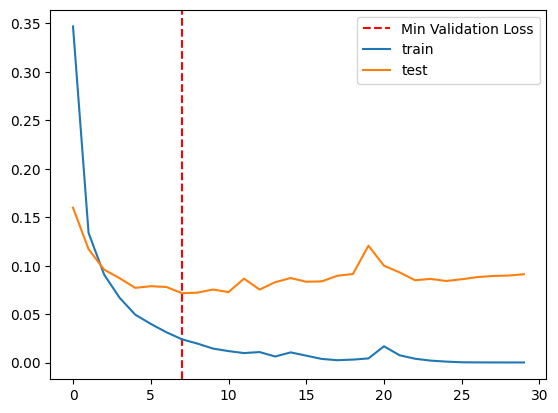

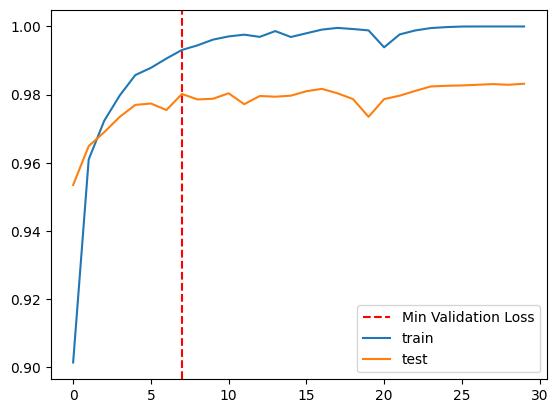

In [2]:

# Optimal epoch to stop
min_val_loss_epoch = history.history['val_loss'].index(min(history.history['val_loss']))

plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--', label='Min Validation Loss')

# Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--', label='Min Validation Loss')
# Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [3]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = np.argmax(model.predict(test_X), axis=1)
cm = confusion_matrix(test_y, predictions)
print(cm)

313/313 [==============================] - 1s 3ms/step - loss: 0.0912 - accuracy: 0.9832
Test accuracy: 0.9832000136375427
313/313 [==============================] - 1s 2ms/step
[[ 970    0    1    0    2    1    2    1    2    1]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   4    1 1016    1    0    0    2    5    3    0]
 [   0    0    4  992    0    3    0    3    2    6]
 [   1    2    5    0  962    0    2    1    2    7]
 [   1    0    0    9    1  871    4    1    4    1]
 [   3    2    1    1    4    2  944    0    1    0]
 [   1    3    5    0    1    1    0 1011    2    4]
 [   3    1    3    4    1    1    1    5  952    3]
 [   1    2    0    2    7    3    0    3    3  988]]


# Using Convolutional layers

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load data
(train_X, train_y), (test_X, test_y) = datasets.mnist.load_data()

# Normalize images
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1)) / 255.0
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1)) / 255.0

# Define CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # Feature extraction parts
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) # Classification part
model.add(layers.Dense(10, activation='softmax'))

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.1435 - accuracy: 0.9561 - val_loss: 0.0673 - val_accuracy: 0.9771
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0458 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0249 - accuracy: 0.9921 - val_loss: 0.0331 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9938 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0146 - accuracy: 0.9952 - val_loss: 0.0402 - val_accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0380 - val_accuracy:

## Learning curves

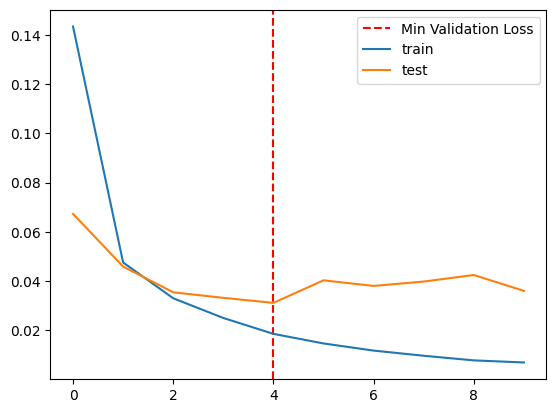

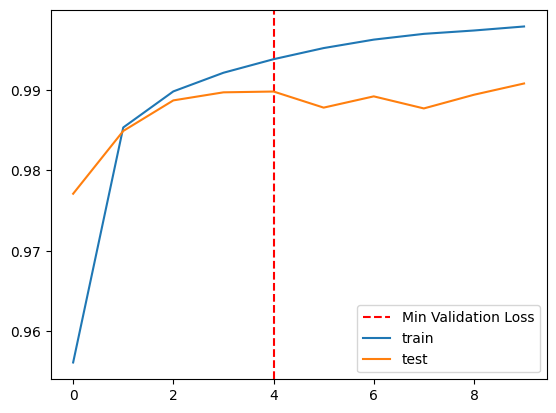

In [5]:

# Optimal epoch to stop
min_val_loss_epoch = history.history['val_loss'].index(min(history.history['val_loss']))

plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--', label='Min Validation Loss')

# Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--', label='Min Validation Loss')
# Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [6]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = np.argmax(model.predict(test_X), axis=1)
cm = confusion_matrix(test_y, predictions)
print(cm)

313/313 [==============================] - 1s 3ms/step - loss: 0.0360 - accuracy: 0.9908
Test accuracy: 0.9908000230789185
313/313 [==============================] - 1s 2ms/step
[[ 976    1    0    0    0    0    2    1    0    0]
 [   0 1130    0    2    0    0    1    1    1    0]
 [   3    0 1019    0    0    0    1    6    3    0]
 [   0    0    0 1005    0    3    0    1    1    0]
 [   0    0    1    0  969    0    2    0    1    9]
 [   1    0    0    8    0  881    1    0    0    1]
 [   4    3    0    0    2    1  948    0    0    0]
 [   0    2    0    0    0    0    0 1022    1    3]
 [   3    0    2    1    1    0    0    1  963    3]
 [   0    0    0    0    2    4    0    3    5  995]]


# Using MobileNet

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications import MobileNet

# Load MobileNet without classification layers ( include_top is false )
mobile_net = MobileNet(input_shape=(128, 128, 3), weights='imagenet', include_top=False)

# Freeze the pretrained layers
mobile_net.trainable = False

# Add classification layers
model = tf.keras.Sequential([
    mobile_net,
    layers.Flatten(),  # Flatten the output before the dense layer
    layers.Dense(10, activation='softmax')
])

# Load MNIST data
(train_X, train_y), (test_X, test_y) = datasets.mnist.load_data()

# Using less training data to prevent resource exhaustion
train_X = train_X[:int(0.2 * len(train_X))]
train_y = train_y[:int(0.2 * len(train_y))]

# Normalization
train_X = train_X / 255.0
test_X = test_X / 255.0

# Expand channel dimension
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(train_X, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(test_X, axis=-1))

# Resize images to 128*128
x_train_resized = tf.image.resize(x_train, (128, 128))
x_test_resized = tf.image.resize(x_test, (128, 128))

# One-hot encode the labels
train_y_one_hot = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y_one_hot = tf.keras.utils.to_categorical(test_y, num_classes=10)

# Build and compile your model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_resized, train_y_one_hot, epochs=10, validation_data=(x_test_resized, test_y_one_hot))


Epoch 1/10
375/375 [==============================] - 15s 32ms/step - loss: 0.2487 - accuracy: 0.9510 - val_loss: 0.1807 - val_accuracy: 0.9667
Epoch 2/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0679 - accuracy: 0.9858 - val_loss: 0.1447 - val_accuracy: 0.9802
Epoch 3/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0615 - accuracy: 0.9878 - val_loss: 0.1815 - val_accuracy: 0.9781
Epoch 4/10
375/375 [==============================] - 10s 27ms/step - loss: 0.0177 - accuracy: 0.9962 - val_loss: 0.1627 - val_accuracy: 0.9816
Epoch 5/10
375/375 [==============================] - 10s 28ms/step - loss: 0.0643 - accuracy: 0.9896 - val_loss: 0.2665 - val_accuracy: 0.9785
Epoch 6/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0551 - accuracy: 0.9921 - val_loss: 0.2090 - val_accuracy: 0.9824
Epoch 7/10
375/375 [==============================] - 11s 29ms/step - loss: 0.0300 - accuracy: 0.9954 - val_loss: 0.2336 - val_accuracy: 

## Learning curves

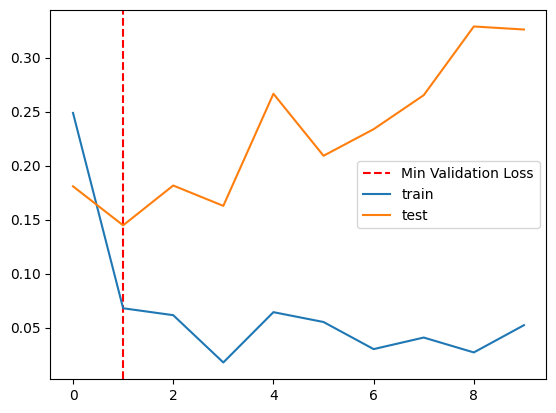

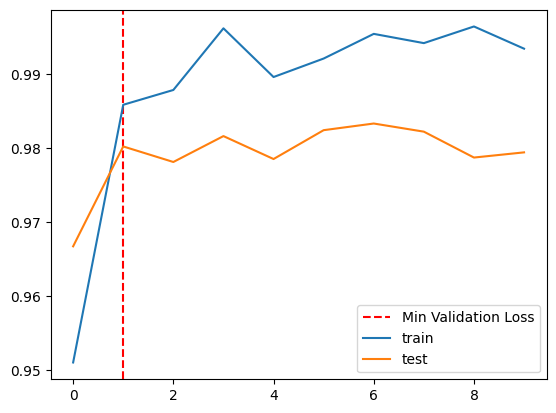

In [4]:

# Optimal epoch to stop
min_val_loss_epoch = history.history['val_loss'].index(min(history.history['val_loss']))

plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--', label='Min Validation Loss')

# Loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--', label='Min Validation Loss')
# Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [8]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test_resized, test_y_one_hot)
print('Test accuracy:', test_acc)

# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np

predictions = np.argmax(model.predict(x_test_resized), axis=1)
cm = confusion_matrix(test_y, predictions)
print(cm)

313/313 [==============================] - 5s 17ms/step - loss: 0.3259 - accuracy: 0.9794
Test accuracy: 0.9793999791145325
313/313 [==============================] - 4s 12ms/step
[[ 974    0    5    0    0    0    0    1    0    0]
 [   0 1124    9    0    0    1    1    0    0    0]
 [   1    0 1027    1    0    0    0    3    0    0]
 [   0    0    9  995    0    4    0    1    1    0]
 [   0    0    6    0  960    0    0    1    5   10]
 [   1    0    9   21    0  857    2    2    0    0]
 [   7    0   21    0    0    5  923    0    2    0]
 [   1    4   24    1    1    0    0  994    0    3]
 [   2    0    7    7    0    0    0    0  957    1]
 [   1    0    9    2    5    0    0    1    8  983]]
